# Musk vs Non Musk Classification using Deep Neural Network

Dataset is uploaded to a github repo URL is saved here

In [0]:
URL = "https://raw.githubusercontent.com/rani700/datasets/master/musk_csv.csv"

### Importing libraries for data manipulation and visualisation

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Reading dataset into DataFrame

In [0]:
df = pd.read_csv(URL)

In [9]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


### Seperating Features (Input) and Output for training

In [0]:
X = df.iloc[:, 3:-1].values

In [11]:
X.shape

(6598, 166)

In [0]:
y = df.iloc[:, -1].values

### Scaling the data using StandardScaler

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

### Spliting the dataset into training and testing set (Ratio 80:20)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

### Importing Sequential model and Dense Layer from keras

In [20]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Making model for training

In [22]:
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Training on train set generated above and using test set as validation data over 20 epochs

In [23]:
model.fit(X_train, y_train, verbose=1, validation_data=(X_test, y_test), epochs=20)






Train on 5278 samples, validate on 1320 samples
Epoch 1/20





5278/5278 [==============================] - 10s 2ms/step - loss: 0.0494 - acc: 0.9390 - val_loss: 0.0289 - val_acc: 0.9697
Epoch 2/20
5278/5278 [==============================] - 1s 137us/step - loss: 0.0235 - acc: 0.9704 - val_loss: 0.0209 - val_acc: 0.9750
Epoch 3/20
5278/5278 [==============================] - 1s 131us/step - loss: 0.0155 - acc: 0.9814 - val_loss: 0.0189 - val_acc: 0.9773
Epoch 4/20
5278/5278 [==============================] - 1s 133us/step - loss: 0.0113 - acc: 0.9871 - val_loss: 0.0144 - val_acc: 0.9856
Epoch 5/20
5278/5278 [==============================] - 1s 126us/step - loss: 0.0100 - acc: 0.9877 - val_loss: 0.0120 - val_acc: 0.9871
Epoch 6/20
5278/5278 [==============================] - 1s 128us/step - loss: 0.0092 - acc: 0.9888 - val_loss: 0.0135 - val_acc: 0.9826
Epoch 7/20
5278/5278 [==============================] - 1s 127us/step - loss: 0.0057 - acc: 0.9930 - val_loss: 0.0108 - val_acc

### Plotting Training vs Validation Accuracy and Loss

In [0]:
train_accuracy = model.history.history['acc']
validation_accuracy = model.history.history['val_acc']

train_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']

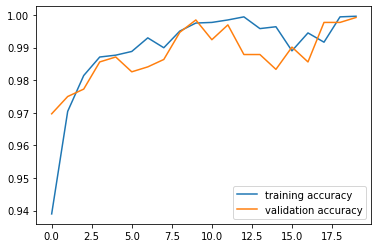

In [25]:
plt.plot(train_accuracy, label='training accuracy')
plt.plot(validation_accuracy, label='validation accuracy')
plt.legend()
plt.show()

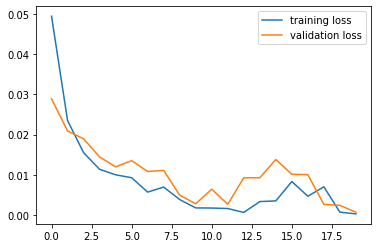

In [26]:
plt.plot(train_loss, label='training loss')
plt.plot(validation_loss, label='validation loss')
plt.legend()
plt.show()

### Generating Classification Report and Confusion matrix

In [0]:
y_hat = model.predict(X_test)

In [0]:
y_hat = (y_hat[:] > 0.5).astype(int).flatten()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00       202

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



In [0]:
model.save('model_dnn.h5')

In [58]:
print("Accuracy = ")
sum((y_hat == y_test).astype(int))/len(y_hat)

Accuracy = 


0.9992424242424243

In [59]:
confusion_matrix(y_test,y_hat)

array([[1117,    1],
       [   0,  202]])